In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('diabetes.csv')

# Step 1: Descriptive Statistics

In [3]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(499, 9)

In [8]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


In [5]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,499.0,3.803607,3.345786,0.000,1.000,3.000,6.0000,17.00
Glucose,499.0,121.354709,32.441489,0.000,100.000,117.000,142.0000,197.00
BloodPressure,499.0,68.743487,19.452608,0.000,64.000,70.000,80.0000,122.00
SkinThickness,499.0,20.575150,15.720190,0.000,0.000,23.000,33.0000,63.00
Insulin,499.0,80.390782,119.774561,0.000,0.000,36.000,122.0000,846.00
BMI,499.0,31.984569,8.210358,0.000,27.050,32.000,36.6000,67.10
DiabetesPedigreeFunction,499.0,0.485377,0.345546,0.078,0.252,0.383,0.6335,2.42
Age,499.0,33.086172,11.636849,21.000,24.000,29.000,39.5000,81.00
Outcome,499.0,0.364729,0.481837,0.000,0.000,0.000,1.0000,1.00


In [10]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Observations:
There are a total of 768 records and 9 features in the dataset.
Each feature can be either of integer or float dataype.
Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
There are zero NaN values in the dataset.
In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# Step 2: Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

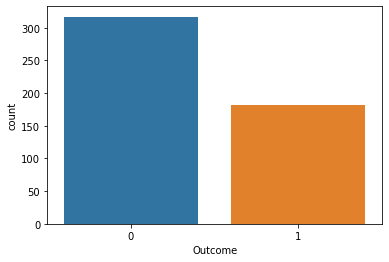

In [6]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

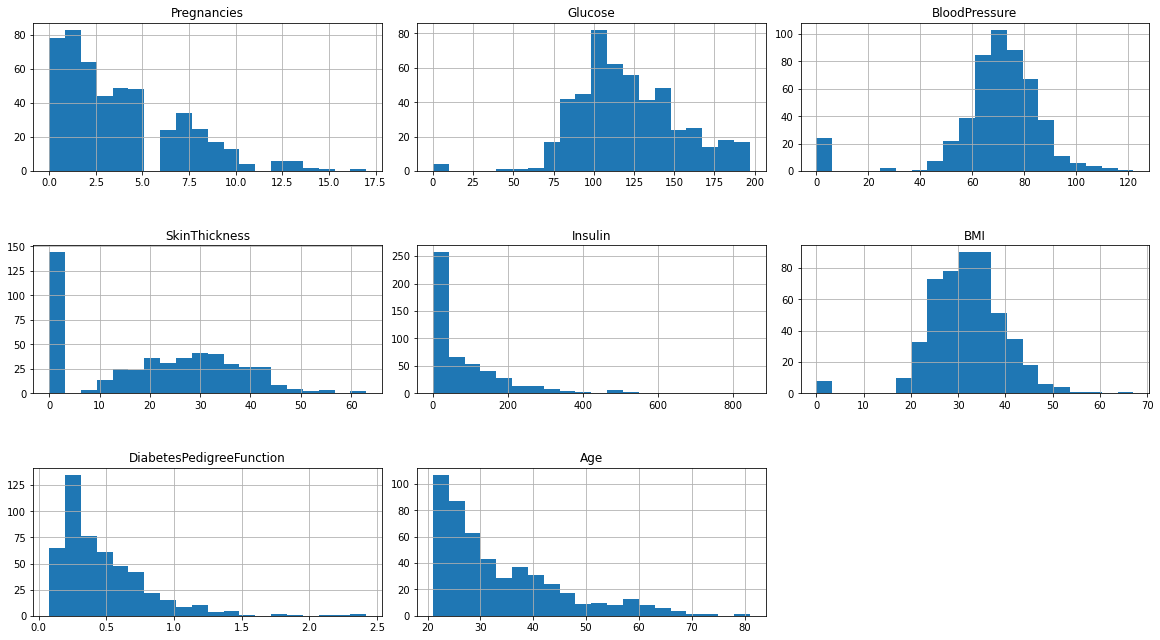

In [7]:

# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

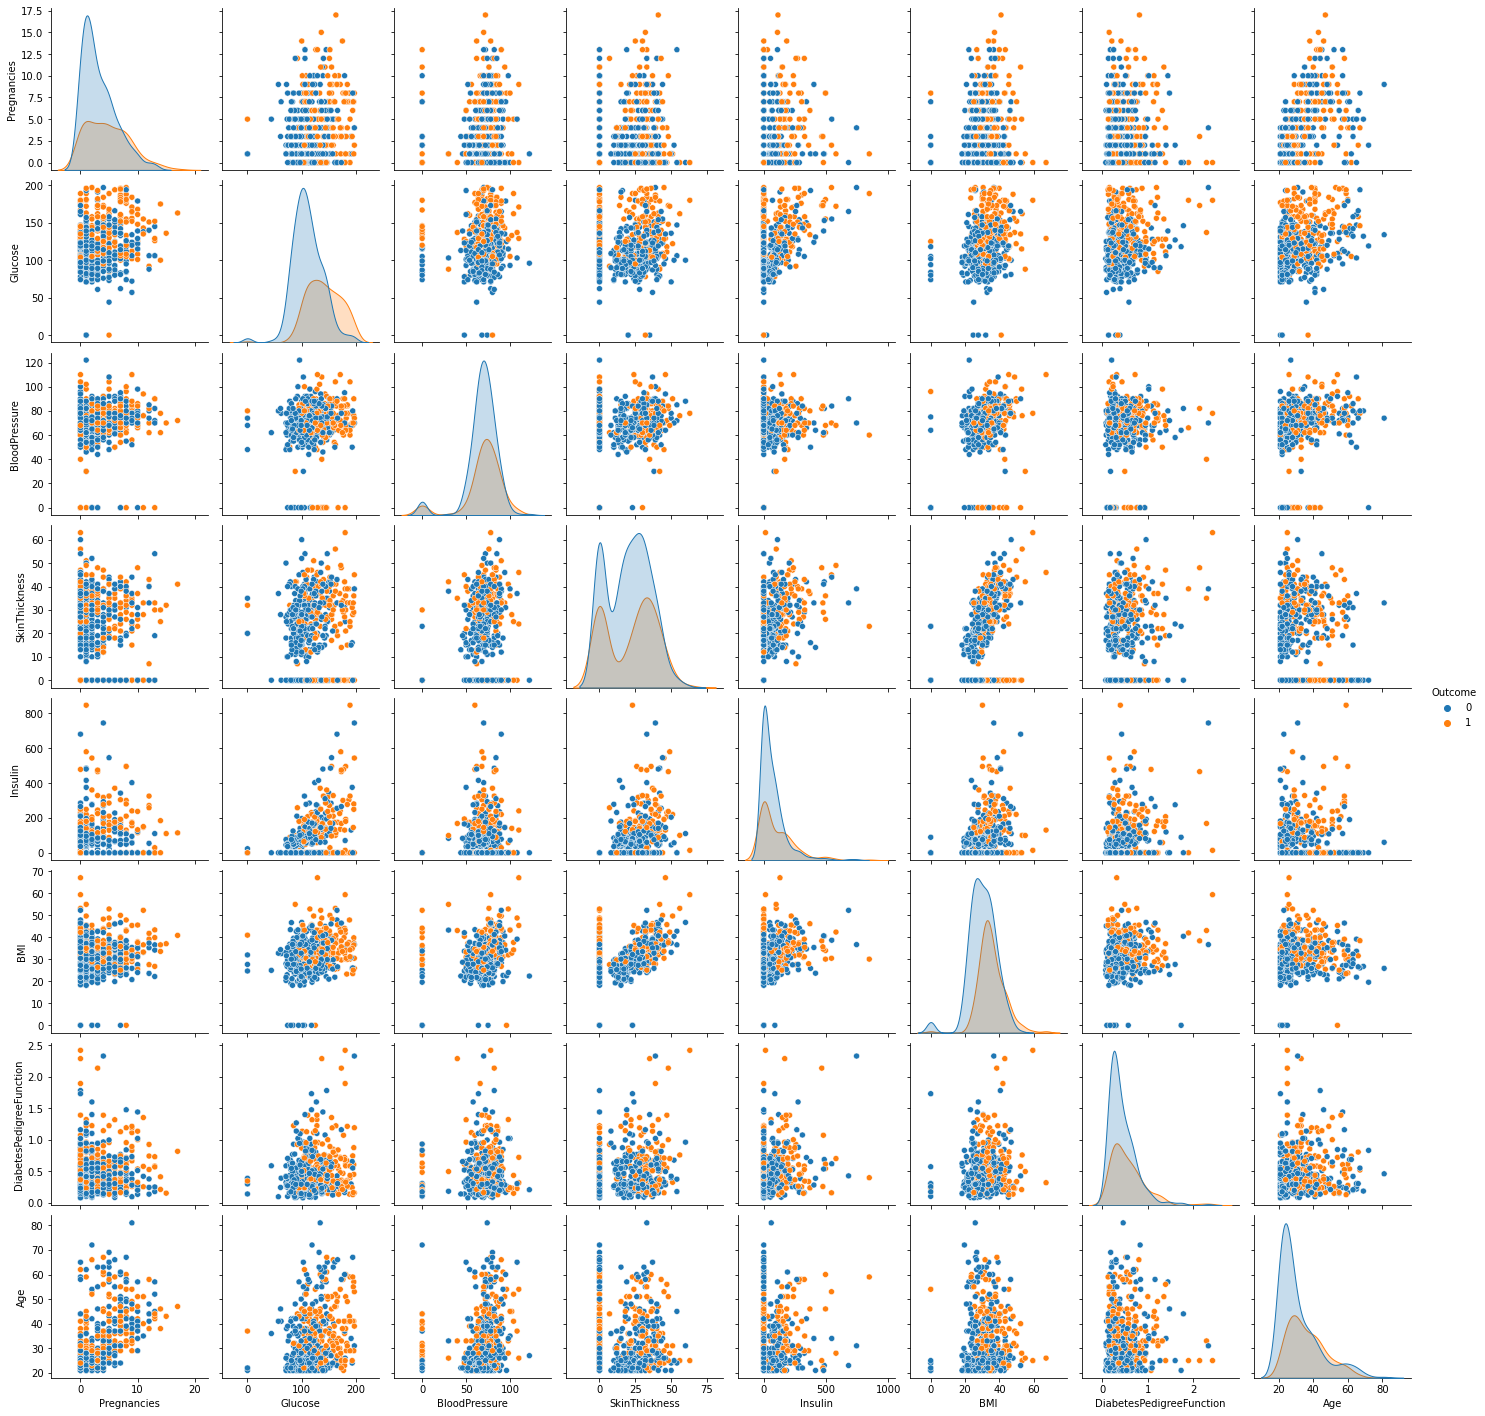

In [8]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

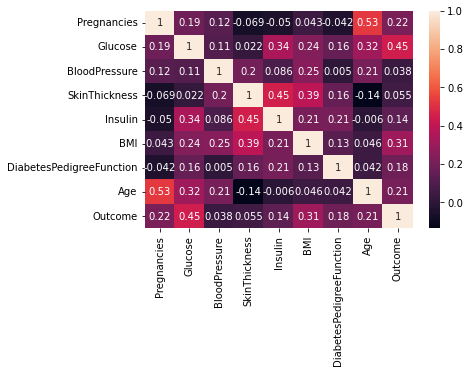

In [10]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Observations:
The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than 
those who do.From the correaltion heatmap, we can see that there is a high correlation between Outcome and 
[Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

# Step 3: Data Preprocessing

In [11]:
dataset_new = dataset

In [12]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]= dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [13]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                24
SkinThickness               144
Insulin                     242
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [15]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,499.0,3.803607,3.345786,0.000,1.000,3.000000,6.000000,17.00
Glucose,499.0,122.335354,30.548412,44.000,100.000,118.000000,142.000000,197.00
BloodPressure,499.0,72.216842,11.796353,30.000,64.000,72.000000,80.000000,122.00
SkinThickness,499.0,28.921127,8.663707,7.000,25.000,28.921127,33.000000,63.00
Insulin,499.0,156.089494,90.819859,14.000,115.500,156.089494,156.089494,846.00
BMI,499.0,32.505703,7.120975,18.200,27.400,32.400000,36.600000,67.10
DiabetesPedigreeFunction,499.0,0.485377,0.345546,0.078,0.252,0.383000,0.633500,2.42
Age,499.0,33.086172,11.636849,21.000,24.000,29.000000,39.500000,81.00
Outcome,499.0,0.364729,0.481837,0.000,0.000,0.000000,1.000000,1.00


In [16]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [17]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [18]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [19]:

# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [20]:
 #Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (399, 4)
X_test shape: (100, 4)
Y_train shape: (399,)
Y_test shape: (100,)


# Step 4: Data Modelling

In [21]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

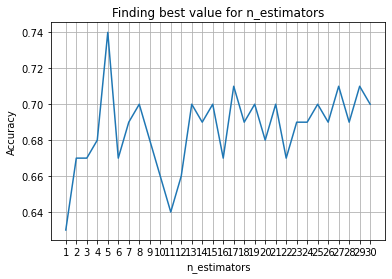

Highest value:  0.74


In [22]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [23]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [24]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [25]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [26]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [28]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [29]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [31]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 69.0
K Nearest neighbors: 69.0
Support Vector Classifier: 68.0
Naive Bayes: 67.0
Decision tree: 65.0
Random Forest: 69.0


In [32]:

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

array([[53, 11],
       [20, 16]], dtype=int64)

<AxesSubplot:>

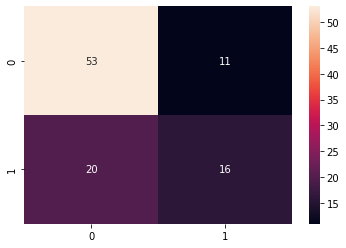

In [33]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [34]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.73      0.83      0.77        64
         1.0       0.59      0.44      0.51        36

    accuracy                           0.69       100
   macro avg       0.66      0.64      0.64       100
weighted avg       0.68      0.69      0.68       100

